In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

In [55]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [56]:
from keras import models,layers,optimizers,losses
from keras import backend as k

## Load digitals

In [57]:
digits=load_digits()
x_data=digits.data.astype(np.float32)
y_data=digits.target.astype(np.float32)[:,np.newaxis]

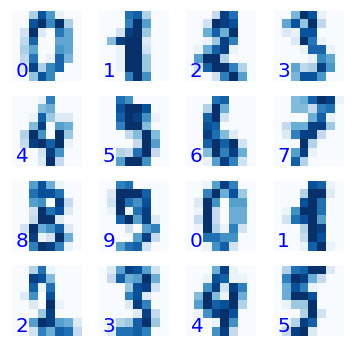

In [58]:
fig=plt.figure(figsize=(6,6))
for i in np.arange(0,16):
    plt.subplot(4,4,i+1,xticks=[],yticks=[])
    plt.imshow(digits.images[i],cmap=plt.cm.Blues)
    plt.text(0,7,str(digits.target[i]),color="b",size=20)

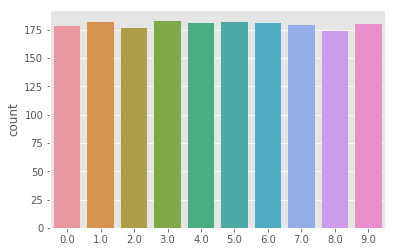

In [59]:
sns.countplot(y_data.reshape(-1,))

## Preprocess data

In [60]:
img_row=8
img_col=8
img_channel=1
img_shape=(img_row,img_col,img_channel)

In [61]:
x_data_processed=MinMaxScaler().fit_transform(x_data).reshape(-1,img_row,img_col,img_channel)
y_data_processed=OneHotEncoder().fit_transform(y_data).todense()

C:\Python36\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_data_processed,y_data_processed,test_size=0.2,random_state=42)

In [63]:
x_train.shape

(1437, 8, 8, 1)

In [64]:
y_train.shape

(1437, 10)

## Model

In [109]:
model=models.Sequential()
model.add(layers.Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding='SAME',activation='relu',input_shape=img_shape))
model.add(layers.MaxPool2D(pool_size=(3,3),strides=(2,2),padding="SAME"))
model.add(layers.Conv2D(filters=5,kernel_size=(3,3),strides=(1,1),padding="SAME",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="SAME"))
model.add(layers.Flatten())
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 8, 8, 10)          100       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 10)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 5)           455       
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 5)           20        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 2, 2, 5)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 50)              

In [110]:
model.compile(optimizer=optimizers.Adam(),loss=losses.categorical_crossentropy,metrics=["accuracy"])

## Fit

In [115]:
batch_size=100
epochs=100
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/100
1437/1437 [==============================] - 0s 90us/step - loss: 0.1331 - accuracy: 0.9659
Epoch 2/100
1437/1437 [==============================] - 0s 88us/step - loss: 0.1275 - accuracy: 0.9638
Epoch 3/100
1437/1437 [==============================] - 0s 83us/step - loss: 0.1154 - accuracy: 0.9708
Epoch 4/100
1437/1437 [==============================] - 0s 83us/step - loss: 0.1231 - accuracy: 0.9652
Epoch 5/100
1437/1437 [==============================] - 0s 81us/step - loss: 0.1140 - accuracy: 0.9715
Epoch 6/100
1437/1437 [==============================] - 0s 80us/step - loss: 0.1006 - accuracy: 0.9701
Epoch 7/100
1437/1437 [==============================] - 0s 80us/step - loss: 0.1107 - accuracy: 0.9756
Epoch 8/100
1437/1437 [==============================] - 0s 79us/step - loss: 0.1264 - accuracy: 0.9666
Epoch 9/100
1437/1437 [==============================] - 0s 97us/step - loss: 0.1088 - accuracy: 0.9722
Epoch 10/100
1437/1437 [==============================] - 0s 86u

In [116]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.063292302025689
Test accuracy: 0.8805555701255798
